Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Note that this Pre-class Work is estimated to take **43 minutes**.

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your name and collaborators below:

In [1]:
NAME = "Simon Andren"
COLLABORATORS = ""

---

# CS110 Pre-class Work - Heaps and priority queues

## Question 1. (Exercise 6.5-1 from Cormen et al.) [time estimate: 7 minutes]

Illustrate the operation of $HEAP-EXTRACT-MAX$ on the heap $A= \langle 15, 13, 9, 5, 12, 8, 7, 4, 0, 6, 2, 1 \rangle$


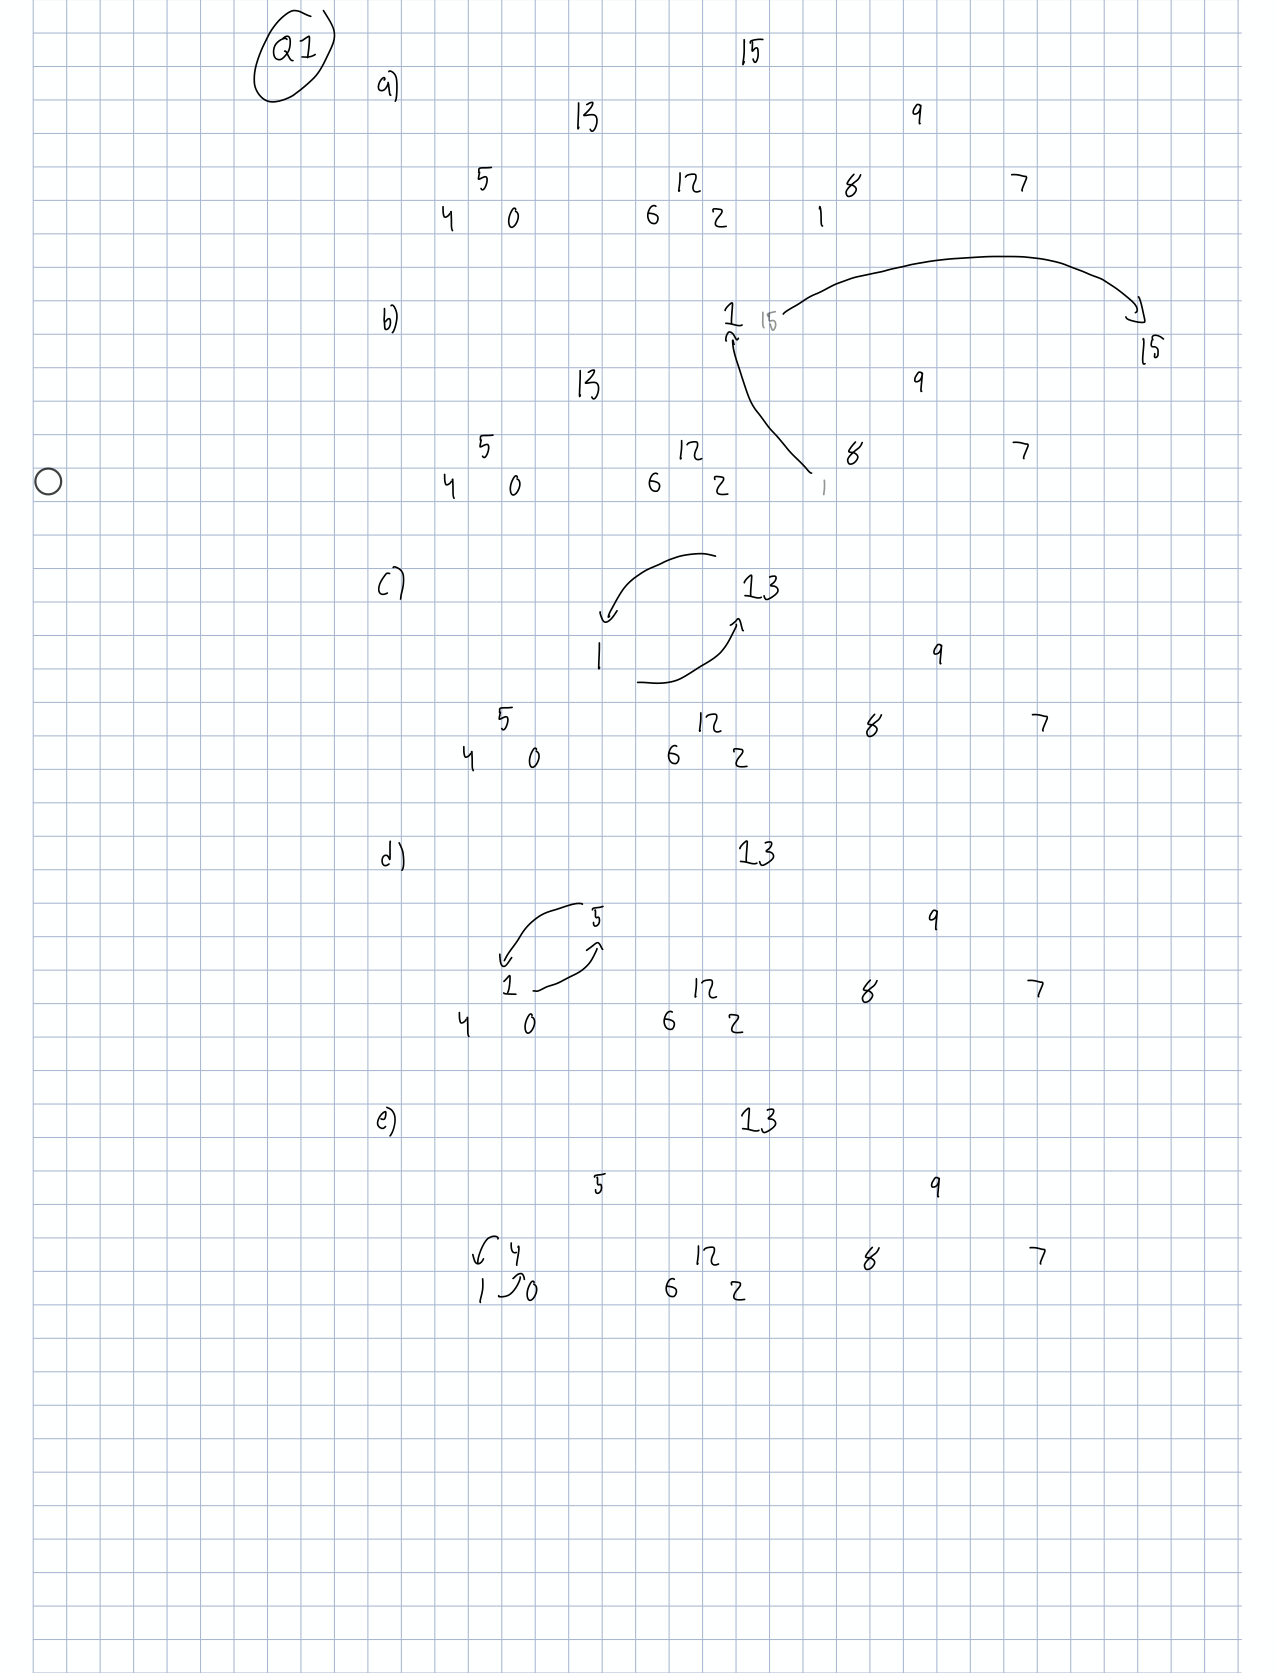

In [2]:
from IPython.display import Image
Image(filename="Q1.png")

## Question 2. (Exercise 6.5-2 from Cormen et al.) [time estimate: 7 minutes]

Illustrate the operation of $MAX-HEAP-INSERT(A, 10)$ on the heap $A=\langle 15, 13, 9, 5, 12, 8, 7, 4, 0, 6, 2, 1\rangle$.

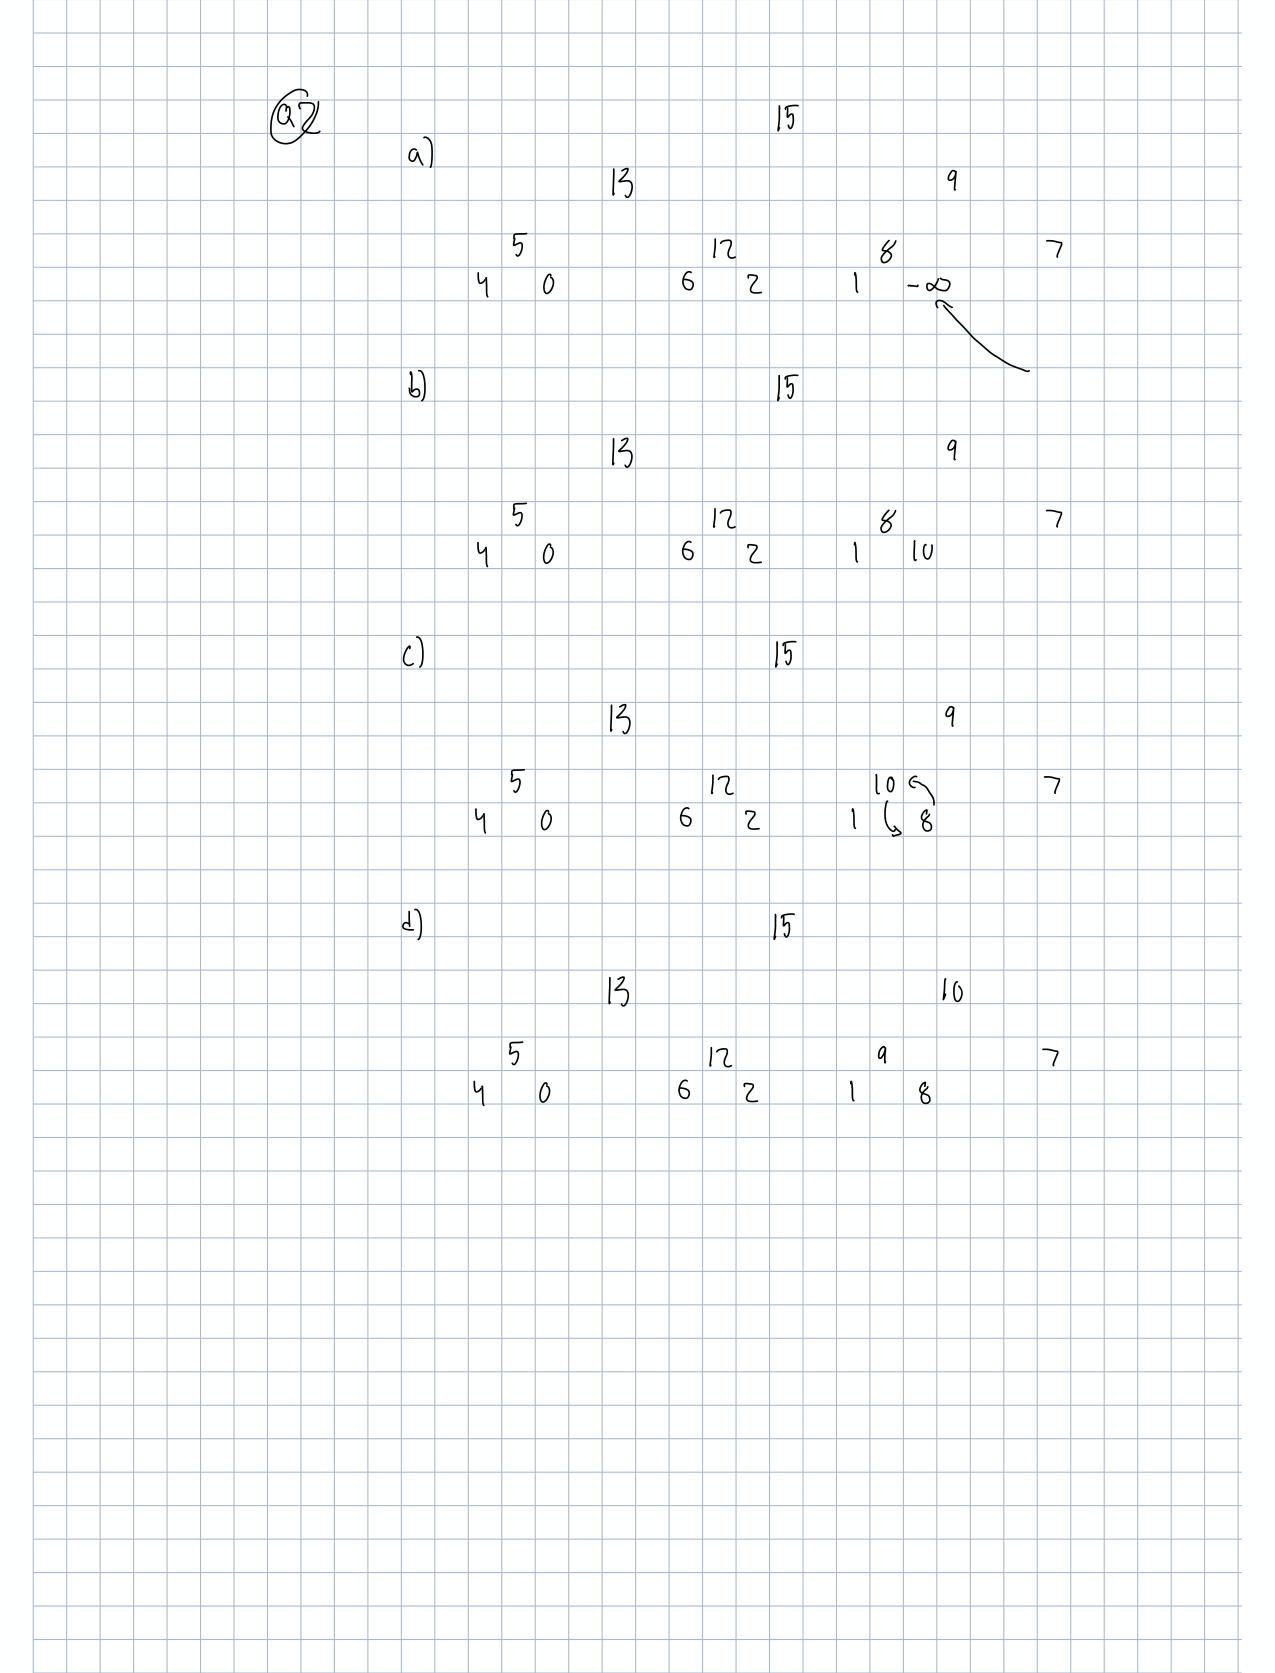

In [3]:
from IPython.display import Image
Image(filename="Q2.png")

## Question 3. Implementing Priority Queues Using Max and Min Heap Data Structures [time estimate: 29 minutes]

The next cell contains a Python implementation of a very basic priority queue based on a max heap data structure.<br>
Please read and follow the <b>Instructions and Tasks</b> that are included below the next cell. These instructions and exercises will guide you through the Python code (i.e., <i><b>skip the Python code for now</b></i> and first proceed to read the instructions below the cell containing the Python code.) 

In [4]:
# Defining some basic binary tree functions
def left(i):             # left(i): takes as input the array index of a parent node in the binary tree and 
    return 2*i + 1       #          returns the array index of its left child.

def right(i):            # right(i): takes as input the array index of a parent node in the binary tree and 
    return 2*i + 2       #           returns the array index of its right child.

def parent(i):           # parent(i): takes as input the array index of a node in the binary tree and
    return (i-1)//2      #            returns the array index of its parent



class MaxHeapq:
    """ 
    This class implements properties and methods that support a max 
    priority queue data structure
    
    Attributes
    ----------
    heap : list
        A Python list where key values in the max heap are stored
        
    heap_size : int
        An integer counter of the number of keys present in the max heap
        
    """ 
    
    
    def __init__(self):
        """
        Class initialization method.
        
        Note
        ----
        Use heapq_var = MaxHeap()
        
        """
        self.heap       = []
        self.heap_size  = 0

        
    def maxk(self):
        """
        This method returns the highest key in the priority queue
        
        Note
        ----
        Use key_var = heap_var.max()
        
        """
        return self.heap[0] 
    
     
    def heappush(self, key):   
        """
        Inserts the value of key onto the priority queue, maintaining the
        max heap invariant.
        
        Note
        ----
        Use heapq_var.heappush(key)
        
        """
        self.heap.append(-float("inf"))
        self.increase_key(self.heap_size,key)
        self.heap_size+=1
        
        
    def increase_key(self, i, key): 
        """
        This method implements the INCREASE_KEY operation, which modifies 
        the value of a key in the max priority queue with a higher value. 
        
        Note
        ----
        Use heapq_var.increase_key(i, new_key)
        
        """
        if key < self.heap[i]:
            raise ValueError('new key is smaller than the current key')
        self.heap[i] = key
        while i > 0 and self.heap[parent(i)] < self.heap[i]:
            j = parent(i)
            holder = self.heap[j]
            self.heap[j] = self.heap[i]
            self.heap[i] = holder
            i = j    
            
        
    def heapify(self, i):
        """
        This method implements the MAX_HEAPIFY operation for the max priority
        queue. The input is the array index of the root node of the subtree to 
        be heapify.
        
        Note
        ----
        Use heapq_var.heapify(i)
        
        """
        l = left(i)
        r = right(i)
        heap = self.heap
        if l <= (self.heap_size-1) and heap[l]>heap[i]:
            largest = l
        else:
            largest = i
        if r <= (self.heap_size-1) and heap[r] > heap[largest]:
            largest = r
        if largest != i:
            heap[i], heap[largest] = heap[largest], heap[i]
            self.heapify(largest)


    def heappop(self):
        """
        This method implements the EXTRACT_MAX operation. It returns the largest
        key in the max priority queue and removes this key from the max priority 
        queue.
        
        Note
        ----
        Use key_var = heapq_var.heappop() 
        
        """
        if self.heap_size < 1:
            raise ValueError('Heap underflow: There are no keys in the priority queue ')
        maxk = self.heap[0]
        self.heap[0] = self.heap[-1]
        self.heap.pop()
        self.heap_size-=1
        self.heapify(0)
        return maxk

## Instructions and Tasks.

The goal of these tasks is for you to learn how to implement, build, and manage priority queues in Python. 

First, let us practice building a max priority queue from a random list of keys.<br> 
For example, given a list of keys: [4,3,6,8,2,-5,100], we want to obtain a max priority queue that looks like this: [100, 6, 8, 3, 2, -5, 4], recall that in a max priority list the highest key should be on top (given priority). 

### Task 0 [time estimate: 3 minutes]

Check whether the list [100, 6, 8, 3, 2, -5, 4] is indeed a max priority queue. Recall that a max priority queue data structure is based on a max heap data structure. Give a short explanation.

Yes! The above list is indeed a max priority queue. It satify the max-heap property. This is because the root node it of the maximum value. The two (only) parents, 6, 8 have children with lesser values.
6 has 3,2 and 8 has -5,4

### Task 1 [time estimate: 10 minutes]

The following cell uses the Python implementation of a max priority queue. This is a good time to review the Python code above and then follow the rest of these instructions.

In [5]:
# GOAL: BUILD HEAP FROM [4,3,6,8,2,-5,100]
#   Study the following lines of code, execute the cell and make sure you understand how the
#   Python implementation of the MaxHeapq is used here and the output from these lines.
A = [4,3,6,8,2,-5,100]
my_heap = MaxHeapq()

for key in A:
    my_heap.heappush(key)

print(my_heap.heap)

[100, 6, 8, 3, 2, -5, 4]


The code works by first creating a class object from MaxHeappq that is called my_heap. It has size 0 and no keys. It then adds all the element in A to my_heap using the heappush method. All the elements in A will be added as keys. 

### Task 2 [time estimate: 3 minutes]

Given the list [6,4,7,9,10,-5,-6,12,8,3,1,-10], build a max heap. You should store the Python list that represents the max heap in a variable named `my_heap_list`.



In [6]:
#Creates a list of elements (keys) to be included in the priority queue
A1 = [6,4,7,9,10,-5,-6,12,8,3,1,-10]

#Creates an MaxHeapq object called heap1
heap1 = MaxHeapq()

#loops through the keys/elements stored in A and push it into the heap1
for key in A1:
    heap1.heappush(key)

#stores the heap from the priority queue as a list in the my_heap_list
my_heap_list = heap1.heap

print(my_heap_list)

#raise NotImplementedError()

[12, 10, 6, 9, 7, -5, -6, 4, 8, 3, 1, -10]


In [7]:
# Please ignore this cell. This cell is for us to implement the tests 
# to see if your code works properly. 

### Task 3 [time estimate: 10 minutes]

Using the Python code that implements the class `MaxHeapq` as a reference, build a class `MinHeapq`, a min priority queue. Your class should contain the following method: `mink`, `heappush`, `decrease_key`, `heapify`, and `heappop`.

In [8]:
# Defining some basic binary tree functions
def left(i):             # left(i): takes as input the array index of a parent node in the binary tree and 
    return 2*i + 1       #          returns the array index of its left child.

def right(i):            # right(i): takes as input the array index of a parent node in the binary tree and 
    return 2*i + 2       #           returns the array index of its right child.

def parent(i):           # parent(i): takes as input the array index of a node in the binary tree and
    return (i-1)//2      #            returns the array index of its parent


class MinHeapq:
    """ 
    This class implements properties and methods that support a max 
    priority queue data structure
    
    Attributes
    ----------
    heap : list
        A Python list where key values in the max heap are stored
        
    heap_size : int
        An integer counter of the number of keys present in the max heap
        
    """ 
    
    
    def __init__(self):
        """
        Class initialization method.
        
        Note
        ----
        Use heapq_var = MaxHeap()
        
        """
        self.heap       = []
        self.heap_size  = 0

        
    def mink(self):
        """
        This method returns the highest key in the priority queue
        
        Note
        ----
        Use key_var = heap_var.max()
        
        """
        return self.heap[0] 
    
     
    def heappush(self, key):   
        """
        Inserts the value of key onto the priority queue, maintaining the
        max heap invariant.
        
        Note
        ----
        Use heapq_var.heappush(key)
        
        """
        self.heap.append(float("inf"))
        self.decrease_key(self.heap_size,key)
        self.heap_size+=1
        
        
    def decrease_key(self, i, key): 
        """
        This method implements the decrease_KEY operation, which modifies 
        the value of a key in the min priority queue with a lower value. 
        
        Note
        ----
        Use heapq_var.increase_key(i, new_key)
        
        """
        if key > self.heap[i]:
            raise ValueError('new key is bigger than the current key')
        self.heap[i] = key
        while i > 0 and self.heap[parent(i)] > self.heap[i]:
            j = parent(i)
            holder = self.heap[j]
            self.heap[j] = self.heap[i]
            self.heap[i] = holder
            i = j    
            
        
    def heapify(self, i):
        """
        This method implements the min_HEAPIFY operation for the min priority
        queue. The input is the array index of the root node of the subtree to 
        be heapify.
        
        Note
        ----
        Use heapq_var.heapify(i)
        
        """
        l = left(i)
        r = right(i)
        heap = self.heap
        if l <= (self.heap_size-1) and heap[l]<heap[i]:
            smallest = l
        else:
            smallest = i
        if r <= (self.heap_size-1) and heap[r] < heap[smallest]:
            smallest = r
        if smallest != i:
            heap[i], heap[smallest] = heap[smallest], heap[i]
            self.heapify(smallest)


    def heappop(self):
        """
        This method implements the EXTRACT_Min operation. It returns the smallest
        key in the min priority queue and removes this key from the max priority 
        queue.
        
        Note
        ----
        Use key_var = heapq_var.heappop() 
        
        """
        if self.heap_size < 1:
            raise ValueError('Heap underflow: There are no keys in the priority queue ')
        mink = self.heap[0]
        self.heap[0] = self.heap[-1]
        self.heap.pop()
        self.heap_size-=1
        self.heapify(0)
        return mink
    #raise NotImplementedError()

In [9]:
# Please ignore this cell. This cell is for us to implement the tests 
# to see if your code works properly. 

### Task 4 [time estimate: 3 minutes]

Use your `MinHeapq` implementation to build a min priority queue out of the list [6,4,7,9,10,-5,-6,12,8,3,1,-10]. You should store the Python list that represents the min heap in a variable named `my_heap_list`.

In [10]:
#Creates a list of elements (keys) to be included in the priority queue
A1 = [6,4,7,9,10,-5,-6,12,8,3,1,-10]

heap2 = MinHeapq()

for key in A1:
    heap2.heappush(key)

my_heap_list2 = heap2.heap

print(my_heap_list2)

#raise NotImplementedError()

[-10, 1, -6, 8, 3, -5, 4, 12, 9, 10, 6, 7]


In [11]:
# Please ignore this cell. This cell is for us to implement the tests 
# to see if your code works properly. 